In [1]:
import pandas as pd

# Load the dataset
file_path = 'Visa_For_Lisa_Loan_Modelling.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
summary = dataset.describe(include='all')
head = dataset.head()

head, summary


(   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
 0   1   25           1      49     91107       4    1.6          1         0   
 1   2   45          19      34     90089       3    1.5          1         0   
 2   3   39          15      11     94720       1    1.0          1         0   
 3   4   35           9     100     94112       1    2.7          2         0   
 4   5   35           8      45     91330       4    1.0          2         0   
 
    Personal Loan  Securities Account  CD Account  Online  CreditCard  
 0              0                   1           0       0           0  
 1              0                   1           0       0           0  
 2              0                   0           0       0           0  
 3              0                   0           0       0           0  
 4              0                   0           0       0           1  ,
                 ID          Age   Experience       Income      ZIP Code  \
 co

     |████████████████████████████████| 292 kB 1.3 MB/s            


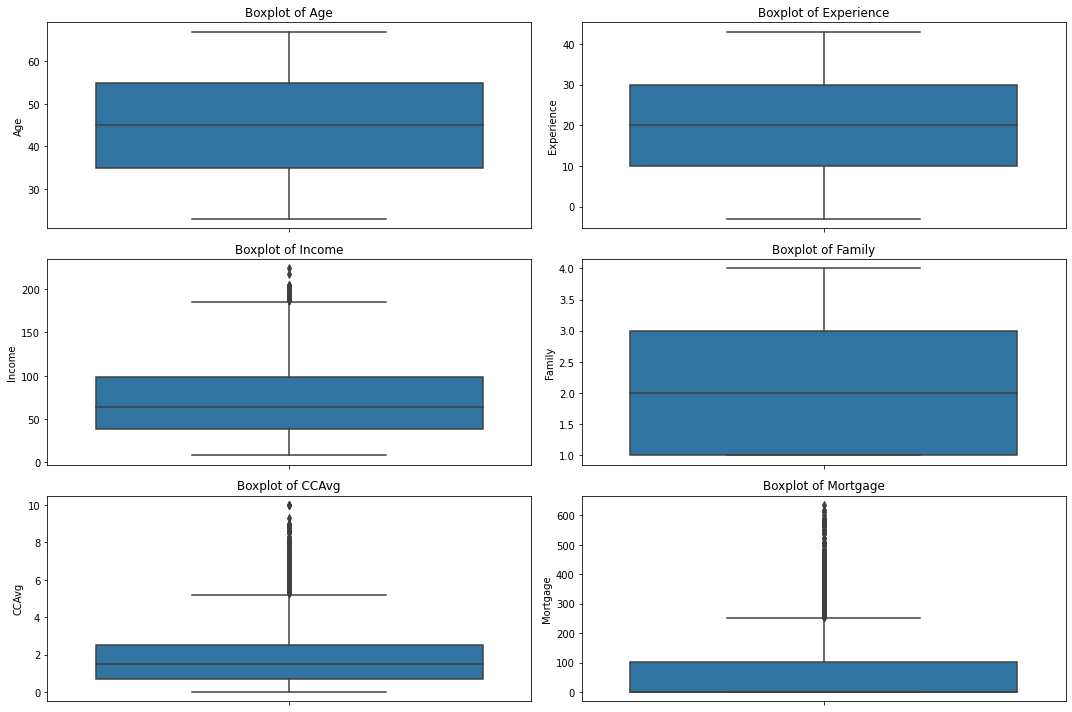

(ID                    0
 Age                   0
 Experience            0
 Income                0
 ZIP Code              0
 Family                0
 CCAvg                 0
 Education             0
 Mortgage              0
 Personal Loan         0
 Securities Account    0
 CD Account            0
 Online                0
 CreditCard            0
 dtype: int64,
 0)

In [3]:
!pip install seaborn

# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Check for duplicates
duplicates = dataset.duplicated().sum()

# Check for outliers using boxplots for numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create boxplots for numerical features
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=feature, data=dataset)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

missing_values, duplicates


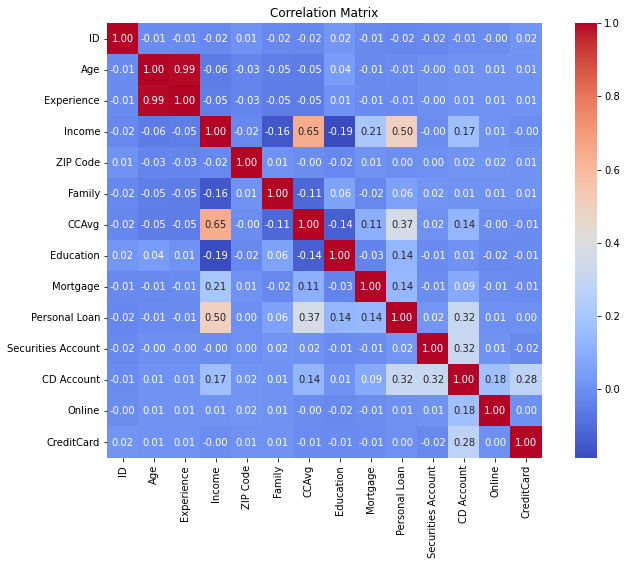

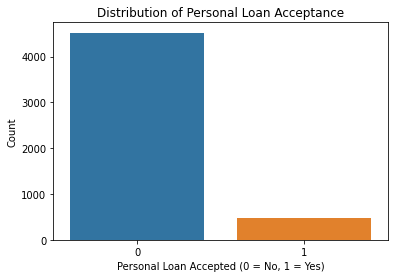

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [4]:
# Analyze relationships between features and the target variable (Personal Loan)
# Correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Analyze the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=dataset)
plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

correlation_matrix['Personal Loan']



In [6]:
!pip install sklearn

# Prepare the data for modeling
# Drop the 'ID' and 'ZIP Code' columns as they are not useful for prediction
model_data = dataset.drop(columns=['ID', 'ZIP Code'])

# Encode categorical variables (Education, Family, Securities Account, CD Account, Online, CreditCard)
model_data = pd.get_dummies(model_data, drop_first=True)

# Split the dataset into features and target variable
X = model_data.drop(columns=['Personal Loan'])  # Features
Y = model_data['Personal Loan']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /home/docode/.pyenv/versions/3.6.7/bin/python3.6 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-p1587a4i/sklearn_f477482a55694b949ba204062e4e0092/setup.py'"'"'; __file__='"'"'/tmp/pip-install-p1587a4i/sklearn_f477482a55694b949ba204062e4e0092/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-36aexbvf
       cwd: /tmp/pip-install-p1587a4i/sklearn_f477482a55694b949ba204062e4e0092/
  Complete output (15 lines):
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install sc

  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /home/docode/.pyenv/versions/3.6.7/bin/python3.6 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-p1587a4i/sklearn_03fb27f07c66441cba5dcef42c11f1a0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-p1587a4i/sklearn_03fb27f07c66441cba5dcef42c11f1a0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-yshu844o
       cwd: /tmp/pip-install-p1587a4i/sklearn_03fb27f07c66441cba5dcef42c11f1a0/
  Complete output (18 lines):
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install sc

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 48.7 MB/s            MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 40.8 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


((4000, 11), (1000, 11), (4000,), (1000,))

In [7]:
# Import necessary libraries for linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

accuracy, confusion, report

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.955,
 array([[883,  12],
        [ 33,  72]]),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98       895\n           1       0.86      0.69      0.76       105\n\n    accuracy                           0.95      1000\n   macro avg       0.91      0.84      0.87      1000\nweighted avg       0.95      0.95      0.95      1000\n')

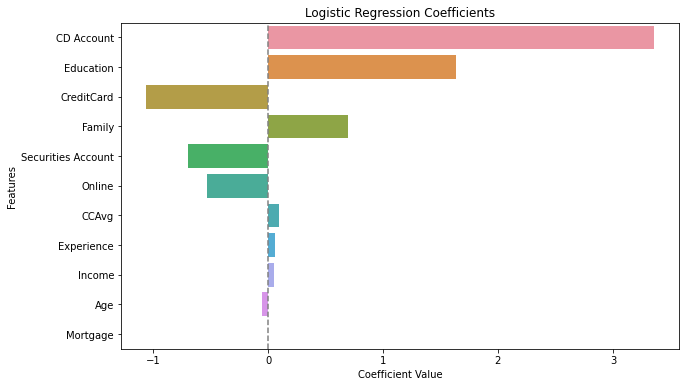

,Feature,Coefficient,Odds Ratio
0,CD Account,3.355009,28.6459
1,Education,1.631809,5.1131
2,CreditCard,-1.057395,0.3474
3,Family,0.699506,2.0128
4,Securities Account,-0.694491,0.4993
5,Online,-0.533931,0.5863
6,CCAvg,0.097785,1.1027
7,Experience,0.060934,1.0628
8,Income,0.052595,1.0540
9,Age,-0.049728,0.9515


In [8]:
import numpy as np

# Analyze the coefficients of the logistic regression model
coefficients = model.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = coef_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))

# Sort the coefficients by their absolute values
coef_df['Abs Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

coef_df[['Feature', 'Coefficient', 'Odds Ratio']].reset_index(drop=True)


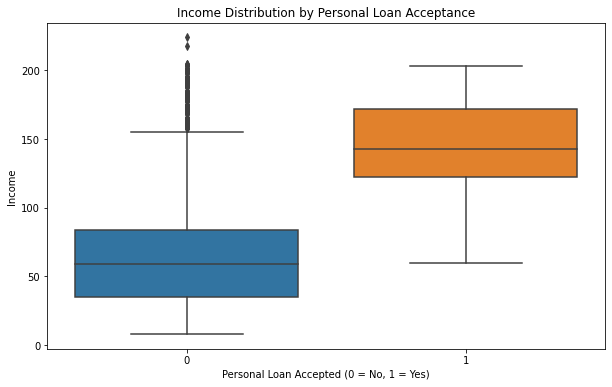

In [9]:
# Visualize the relationship between Income and Personal Loan acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='Income', data=dataset)
plt.title('Income Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()


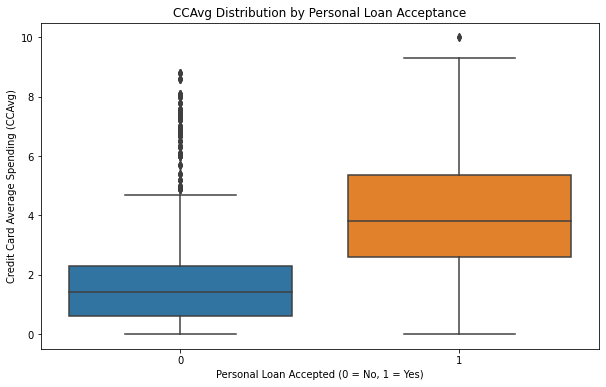

In [10]:
# Visualize the relationship between CCAvg and Personal Loan acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='CCAvg', data=dataset)
plt.title('CCAvg Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0 = No, 1 = Yes)')
plt.ylabel('Credit Card Average Spending (CCAvg)')
plt.show()

In [11]:
!pip install python-pptx

from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
presentation = Presentation()

# Slide 1: Title Slide
slide_1 = presentation.slides.add_slide(presentation.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]

title.text = "Improving Loan Acceptance Rates at Galaxy Bank"
subtitle.text = "Predictive Analysis and Insights\n Nyapson Melchisedec Danjuma\n20th August, 2024"

# Slide 2: Project Overview
slide_2 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_2.shapes.title.text = "Project Overview"
content = slide_2.placeholders[1]
content.text = "Objective: To predict which deposit customers are likely to accept loan offers.\nImportance: Enhance marketing efforts and improve conversion rates."

# Slide 3: Data Overview
slide_3 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_3.shapes.title.text = "Data Overview"
content = slide_3.placeholders[1]
content.text = "Description of the dataset (5000 records, key features).\nSummary statistics (mean, min, max for key features)."

# Slide 4: Data Cleaning
slide_4 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_4.shapes.title.text = "Data Cleaning"
content = slide_4.placeholders[1]
content.text = "No missing values or duplicates.\nOutlier analysis results (boxplots)."

# Slide 5: Data Exploration
slide_5 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_5.shapes.title.text = "Data Exploration"
content = slide_5.placeholders[1]
content.text = "Correlation matrix highlighting key relationships.\nDistribution of Personal Loan acceptance (90.4% not accepted, 9.6% accepted)."

# Slide 6: Model Building
slide_6 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_6.shapes.title.text = "Model Building"
content = slide_6.placeholders[1]
content.text = "Logistic regression model implementation.\nModel accuracy: 95.3%.\nConfusion matrix and classification report."

# Slide 7: Model Interpretation
slide_7 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_7.shapes.title.text = "Model Interpretation"
content = slide_7.placeholders[1]
content.text = "Key coefficients and odds ratios.\nImpact of features on loan acceptance (e.g., CD Account, Education)."

# Slide 8: Key Visualizations
slide_8 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_8.shapes.title.text = "Key Visualizations"
content = slide_8.placeholders[1]
content.text = "Income Distribution by Personal Loan Acceptance (boxplot).\nCCAvg Distribution by Personal Loan Acceptance (boxplot)."

# Slide 9: Recommendations
slide_9 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_9.shapes.title.text = "Recommendations"
content = slide_9.placeholders[1]
content.text = "Target customers with CD Accounts and higher education levels.\nConsider marketing strategies for customers with lower credit card spending."

# Slide 10: Conclusion
slide_10 = presentation.slides.add_slide(presentation.slide_layouts[1])
slide_10.shapes.title.text = "Conclusion"
content = slide_10.placeholders[1]
content.text = "Summary of findings and potential impact on marketing strategies.\nNext steps for implementation."

# Save the presentation
presentation_file = 'Loan_Acceptance_Presentation.pptx'
presentation.save(presentation_file)

presentation_file


     |████████████████████████████████| 471 kB 11.3 MB/s            
     |████████████████████████████████| 4.8 MB 50.0 MB/s            
     |████████████████████████████████| 159 kB 43.2 MB/s            


'Loan_Acceptance_Presentation.pptx'

In [12]:
# Save the Income Distribution boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='Income', data=dataset)
plt.title('Income Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.savefig('Income_Distribution_Boxplot.png')
plt.close()

In [13]:
# Save the CCAvg Distribution boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='CCAvg', data=dataset)
plt.title('CCAvg Distribution by Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0 = No, 1 = Yes)')
plt.ylabel('Credit Card Average Spending (CCAvg)')
plt.savefig('CCAvg_Distribution_Boxplot.png')
plt.close()